In [82]:
import pandas as pd
pd.set_option('display.max_columns', 300)
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set(style="whitegrid")

In [83]:
# loading the file into a dataframe
df_base = pd.read_csv('data_cleaned_no_outliers.csv', index_col=0)
df_base.head()

,age,workclass,education,edu_years,marital_status,occupation,race,hours_per_week,native_country,income_code,sex_code
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,40,US,0,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,13,US,0,0
2,38,Private,HS-grad,9,Divorced/Widowed,Handlers-cleaners,White,40,US,0,0
3,53,Private,9th-11th,7,Married-civ-spouse,Handlers-cleaners,Black,40,US,0,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,40,Central_AM,0,1


In [84]:
df_base.isnull().values.any()

False

In [85]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29310 entries, 0 to 32560
Data columns (total 11 columns):
age               29310 non-null int64
workclass         29310 non-null object
education         29310 non-null object
edu_years         29310 non-null int64
marital_status    29310 non-null object
occupation        29310 non-null object
race              29310 non-null object
hours_per_week    29310 non-null int64
native_country    29310 non-null object
income_code       29310 non-null int64
sex_code          29310 non-null int64
dtypes: int64(5), object(6)
memory usage: 2.7+ MB


## Feature engineering]

In [86]:
# printing the names of all the columns before and after creating dummies

print("Original features:\n", list(df_base.columns), "\n")
data_dummies = pd.get_dummies(df_base)
print("Features after get_dummies:\n", list(data_dummies.columns))

Original features:
 ['age', 'workclass', 'education', 'edu_years', 'marital_status', 'occupation', 'race', 'hours_per_week', 'native_country', 'income_code', 'sex_code'] 

Features after get_dummies:
 ['age', 'edu_years', 'hours_per_week', 'income_code', 'sex_code', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_5th-6th', 'education_7th-8th', 'education_9th-11th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced/Widowed', 'marital_status_Married-civ-spouse', 'marital_status_Never-married', 'occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Prof-specialt

In [87]:
data_dummies.head()

,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US
0,39,13,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,13,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,38,9,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,7,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,13,40,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [88]:
df_base.shape

(29310, 11)

In [89]:
# dropping redundant columns from dummies dataframe 

data_dummies.drop(columns=['age', 'edu_years', 'hours_per_week', 'income_code', 'sex_code'], inplace=True)
data_dummies.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US
0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [90]:
# merging dummies with the main dataframe

df_with_dummies = df_base.join(data_dummies)
df_with_dummies.head()

,age,workclass,education,edu_years,marital_status,occupation,race,hours_per_week,native_country,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,White,40,US,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,White,13,US,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,9,Divorced/Widowed,Handlers-cleaners,White,40,US,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,Private,9th-11th,7,Married-civ-spouse,Handlers-cleaners,Black,40,US,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Black,40,Central_AM,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [91]:
print("Features :\n", list(df_with_dummies.columns))

Features :
 ['age', 'workclass', 'education', 'edu_years', 'marital_status', 'occupation', 'race', 'hours_per_week', 'native_country', 'income_code', 'sex_code', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc', 'workclass_State-gov', 'education_5th-6th', 'education_7th-8th', 'education_9th-11th', 'education_Assoc-acdm', 'education_Assoc-voc', 'education_Bachelors', 'education_Doctorate', 'education_HS-grad', 'education_Masters', 'education_Prof-school', 'education_Some-college', 'marital_status_Divorced/Widowed', 'marital_status_Married-civ-spouse', 'marital_status_Never-married', 'occupation_Adm-clerical', 'occupation_Craft-repair', 'occupation_Exec-managerial', 'occupation_Farming-fishing', 'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct', 'occupation_Other-service', 'occupation_Prof-specialty', 'occupation_Sales', 'occupation_Tech-support', 'occupation_Transport-moving', 'race_Black', 'race_Oth

In [92]:
# saving the file

df_with_dummies.to_csv('df_with_dummies.csv')

In [93]:
# deleting redundant columns

df_with_dummies.drop(columns=['workclass', 'education', 'marital_status', 'occupation', 'race', 'native_country'], inplace=True)
df_with_dummies.head()

,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US
0,39,13,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,13,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,38,9,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,7,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,13,40,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [94]:
df_with_dummies.to_csv('df_with_dummies_reduced.csv')

In [13]:
# creating ploynomials for cont variables
target = df_with_dummies.income_code
features_base = df_with_dummies[['age', 'edu_years', 'hours_per_week', 'sex_code']]

In [14]:
poly = PolynomialFeatures(interaction_only=False, include_bias=False)
poly.fit(features_base)
column_names = poly.get_feature_names(features_base.columns)
df_poly= pd.DataFrame(poly.transform(features_base), columns=column_names)


In [15]:
df_poly.head()

,age,edu_years,hours_per_week,sex_code,age^2,age edu_years,age hours_per_week,age sex_code,edu_years^2,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code,sex_code^2
0,39.0,13.0,40.0,0.0,1521.0,507.0,1560.0,0.0,169.0,520.0,0.0,1600.0,0.0,0.0
1,50.0,13.0,13.0,0.0,2500.0,650.0,650.0,0.0,169.0,169.0,0.0,169.0,0.0,0.0
2,38.0,9.0,40.0,0.0,1444.0,342.0,1520.0,0.0,81.0,360.0,0.0,1600.0,0.0,0.0
3,53.0,7.0,40.0,0.0,2809.0,371.0,2120.0,0.0,49.0,280.0,0.0,1600.0,0.0,0.0
4,28.0,13.0,40.0,1.0,784.0,364.0,1120.0,28.0,169.0,520.0,13.0,1600.0,40.0,1.0


In [16]:
df_poly.drop(columns=['age', 'edu_years', 'hours_per_week', 'sex_code^2', 'sex_code'], inplace=True)

In [17]:
df_poly

,age^2,age edu_years,age hours_per_week,age sex_code,edu_years^2,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code
0,1521.0,507.0,1560.0,0.0,169.0,520.0,0.0,1600.0,0.0
1,2500.0,650.0,650.0,0.0,169.0,169.0,0.0,169.0,0.0
2,1444.0,342.0,1520.0,0.0,81.0,360.0,0.0,1600.0,0.0
3,2809.0,371.0,2120.0,0.0,49.0,280.0,0.0,1600.0,0.0
4,784.0,364.0,1120.0,28.0,169.0,520.0,13.0,1600.0,40.0
5,1369.0,518.0,1480.0,37.0,196.0,560.0,14.0,1600.0,40.0
6,2401.0,245.0,784.0,49.0,25.0,80.0,5.0,256.0,16.0
7,2704.0,468.0,2340.0,0.0,81.0,405.0,0.0,2025.0,0.0
8,961.0,434.0,1550.0,31.0,196.0,700.0,14.0,2500.0,50.0
9,1764.0,546.0,1680.0,0.0,169.0,520.0,0.0,1600.0,0.0


In [18]:
df_poly.isnull().values.any()

False

In [19]:
df_poly.shape

(29310, 9)

In [20]:
df_with_dummies.shape

(29310, 47)

In [21]:
df_poly.reset_index(inplace=True)


In [27]:
df_poly.drop(columns=['index'], inplace=True)

In [23]:
df_with_dummies.reset_index(inplace=True)

In [24]:
df_with_dummies.drop(columns=['index'], inplace=True)

In [25]:
df_with_dummies.head()

,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US
0,39,13,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,13,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,38,9,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,7,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,28,13,40,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [28]:
df_poly.head()

,age^2,age edu_years,age hours_per_week,age sex_code,edu_years^2,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code
0,1521.0,507.0,1560.0,0.0,169.0,520.0,0.0,1600.0,0.0
1,2500.0,650.0,650.0,0.0,169.0,169.0,0.0,169.0,0.0
2,1444.0,342.0,1520.0,0.0,81.0,360.0,0.0,1600.0,0.0
3,2809.0,371.0,2120.0,0.0,49.0,280.0,0.0,1600.0,0.0
4,784.0,364.0,1120.0,28.0,169.0,520.0,13.0,1600.0,40.0


In [29]:
df_with_dummies_poly = df_with_dummies.join(df_poly)


In [30]:
df_with_dummies_poly.shape

(29310, 56)

In [31]:
df_with_dummies_poly.isnull().values.any()

False

In [32]:
df_with_dummies_poly.to_csv('df_with_dummies_poly_and_poly.csv')

In [33]:
df_with_dummies_poly = df_with_dummies_poly.reset_index()

In [34]:
#df_with_dummies_poly.dropna()
df_with_dummies_poly.drop(columns=['index'], inplace=True)


In [35]:
df_with_dummies_poly.head()

,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US,age^2,age edu_years,age hours_per_week,age sex_code,edu_years^2,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code
0,39,13,40,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1521.0,507.0,1560.0,0.0,169.0,520.0,0.0,1600.0,0.0
1,50,13,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,2500.0,650.0,650.0,0.0,169.0,169.0,0.0,169.0,0.0
2,38,9,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1444.0,342.0,1520.0,0.0,81.0,360.0,0.0,1600.0,0.0
3,53,7,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2809.0,371.0,2120.0,0.0,49.0,280.0,0.0,1600.0,0.0
4,28,13,40,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,784.0,364.0,1120.0,28.0,169.0,520.0,13.0,1600.0,40.0


In [36]:
df_with_dummies_poly.isnull().values.any()

False

In [37]:
df_with_dummies_poly.isnull().sum()

age                                  0
edu_years                            0
hours_per_week                       0
income_code                          0
sex_code                             0
workclass_Federal-gov                0
workclass_Local-gov                  0
workclass_Private                    0
workclass_Self-emp-inc               0
workclass_Self-emp-not-inc           0
workclass_State-gov                  0
education_5th-6th                    0
education_7th-8th                    0
education_9th-11th                   0
education_Assoc-acdm                 0
education_Assoc-voc                  0
education_Bachelors                  0
education_Doctorate                  0
education_HS-grad                    0
education_Masters                    0
education_Prof-school                0
education_Some-college               0
marital_status_Divorced/Widowed      0
marital_status_Married-civ-spouse    0
marital_status_Never-married         0
occupation_Adm-clerical  

## Splitting

In [38]:
df_target = df_with_dummies_poly.income_code
df_data = df_with_dummies_poly.drop(columns=['income_code'])

In [39]:
df_data.shape

(29310, 55)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, random_state=34,test_size=0.25)

## Scaling

In [96]:
# standardising
cols_to_stand = ['age','edu_years', 'hours_per_week', 'age^2', 'age edu_years', 'age hours_per_week', 'age sex_code', 'edu_years^2', 'edu_years hours_per_week', 'edu_years sex_code', 'hours_per_week^2', 'hours_per_week sex_code']
df_with_dummies_poly[cols_to_stand] = StandardScaler().fit_transform(df_with_dummies_poly[cols_to_stand])

In [97]:
print(df_with_dummies_poly.shape)
df_with_dummies_poly.head()

(29310, 56)


,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US,age^2,age edu_years,age hours_per_week,age sex_code,edu_years^2,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code
0,0.063387,1.149612,-0.056672,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.095037,0.696633,-0.012412,-0.636648,1.190292,0.630555,-0.670598,-0.188466,-0.656235
1,0.922644,1.149612,-2.577111,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.823901,1.550439,-1.351776,-0.636648,1.190292,-1.528051,-0.670598,-1.836042,-0.656235
2,-0.014727,-0.477013,-0.056672,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.167314,-0.288528,-0.071285,-0.636648,-0.571243,-0.353425,-0.670598,-0.188466,-0.656235
3,1.156987,-1.290325,-0.056672,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.113943,-0.115378,0.811813,-0.636648,-1.211801,-0.845415,-0.670598,-0.188466,-0.656235
4,-0.795871,1.149612,-0.056672,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,-0.786822,-0.157173,-0.660017,0.856902,1.190292,0.630555,1.966516,-0.188466,1.525701


In [100]:
df_with_dummies_poly.to_csv('df_with_dummies_poly_stadatdised.csv')
df_with_dummies_poly.head()

,age,edu_years,hours_per_week,income_code,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,education_5th-6th,education_7th-8th,education_9th-11th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,marital_status_Never-married,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US,age^2,age edu_years,age hours_per_week,age sex_code,edu_years^2,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code
0,0.063387,1.149612,-0.056672,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.095037,0.696633,-0.012412,-0.636648,1.190292,0.630555,-0.670598,-0.188466,-0.656235
1,0.922644,1.149612,-2.577111,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.823901,1.550439,-1.351776,-0.636648,1.190292,-1.528051,-0.670598,-1.836042,-0.656235
2,-0.014727,-0.477013,-0.056672,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,-0.167314,-0.288528,-0.071285,-0.636648,-0.571243,-0.353425,-0.670598,-0.188466,-0.656235
3,1.156987,-1.290325,-0.056672,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1.113943,-0.115378,0.811813,-0.636648,-1.211801,-0.845415,-0.670598,-0.188466,-0.656235
4,-0.795871,1.149612,-0.056672,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,-0.786822,-0.157173,-0.660017,0.856902,1.190292,0.630555,1.966516,-0.188466,1.525701


## Feature selection

In [75]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

In [76]:
clf = DecisionTreeClassifier(random_state=0, max_depth=10)


In [77]:
# # Create recursive feature eliminator that scores features by mean squared errors
# selector = RFECV(estimator=clf, step=1, cv=5, scoring='neg_mean_squared_error')

# # Fit recursive feature eliminator 
# selector.fit(X_train, y_train)


RFECV(cv=5,
   estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [78]:
# selected_columns = X_train.columns[selector.support_]
# removed_columns = X_train.columns[~selector.support_]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [79]:
len(selected_columns)

29

In [86]:
selected_columns

Index(['age', 'edu_years', 'hours_per_week', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'marital_status_Married-civ-spouse',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support', 'race_Black',
       'race_White', 'native_country_Europe', 'native_country_US', 'age^2',
       'age edu_years', 'age hours_per_week', 'age sex_code',
       'edu_years hours_per_week', 'edu_years sex_code', 'hours_per_week^2',
       'hours_per_week sex_code'],
      dtype='object')

In [ ]:
# clf = DecisionTreeClassifier(random_state=0, max_depth=10)
# clf.fit(X_train, y_train)
# y_train_pred = lm.predict(X_train)
# y_pred = clf.predict(X_test)
# train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
# test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# print('Training Error: '+ str(train_rmse) )
# print('Testing Error: '+ str(test_rmse) )

In [85]:
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

Training Error: 0.266329834940188
Testing Error: 0.4252214937856417


In [87]:
# second attemtp

In [41]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 0.29760090825752605
Testing Error: 0.3779497774328851


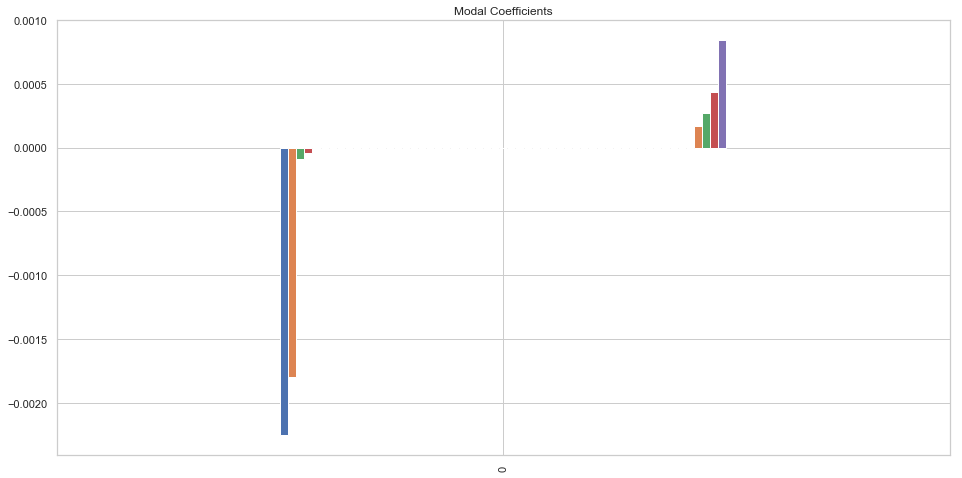

In [42]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [43]:
len(lasso_coef01.columns)

55

In [44]:
lasso_coef01

,hours_per_week sex_code,age sex_code,age^2,hours_per_week^2,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Black,race_Other,race_White,native_country_Asia,native_country_Central_AM,native_country_Europe,native_country_Middle_East,native_country_North_AM,native_country_SEA,native_country_South_AM,native_country_US,edu_years sex_code,occupation_Exec-managerial,occupation_Craft-repair,age,marital_status_Never-married,edu_years,hours_per_week,sex_code,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,occupation_Adm-clerical,education_5th-6th,education_7th-8th,workclass_State-gov,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Prof-school,education_Some-college,marital_status_Divorced/Widowed,marital_status_Married-civ-spouse,education_9th-11th,occupation_Farming-fishing,age hours_per_week,edu_years hours_per_week,edu_years^2,age edu_years
0,-0.002255,-0.001795,-0.000089,-0.000043,-0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,0.000168,0.000269,0.000437,0.000842


In [ ]:
# attempt 3

In [48]:
# Create a list of the features being used in the 
feature_cols = df_data.columns

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#predict the training set
y_pred_train = clf.predict(X_train)

#Predict the response for test dataset
y_pred_test = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",f1_score(y_train, y_pred_train))
print("Testing F1 Score:",f1_score(y_test, y_pred_test))

Training F1 Score: 0.9326721342742705
Testing F1 Score: 0.5457507466739071


In [50]:
# Calculate feature importances
importances = clf.feature_importances_

<Figure size 432x288 with 0 Axes>

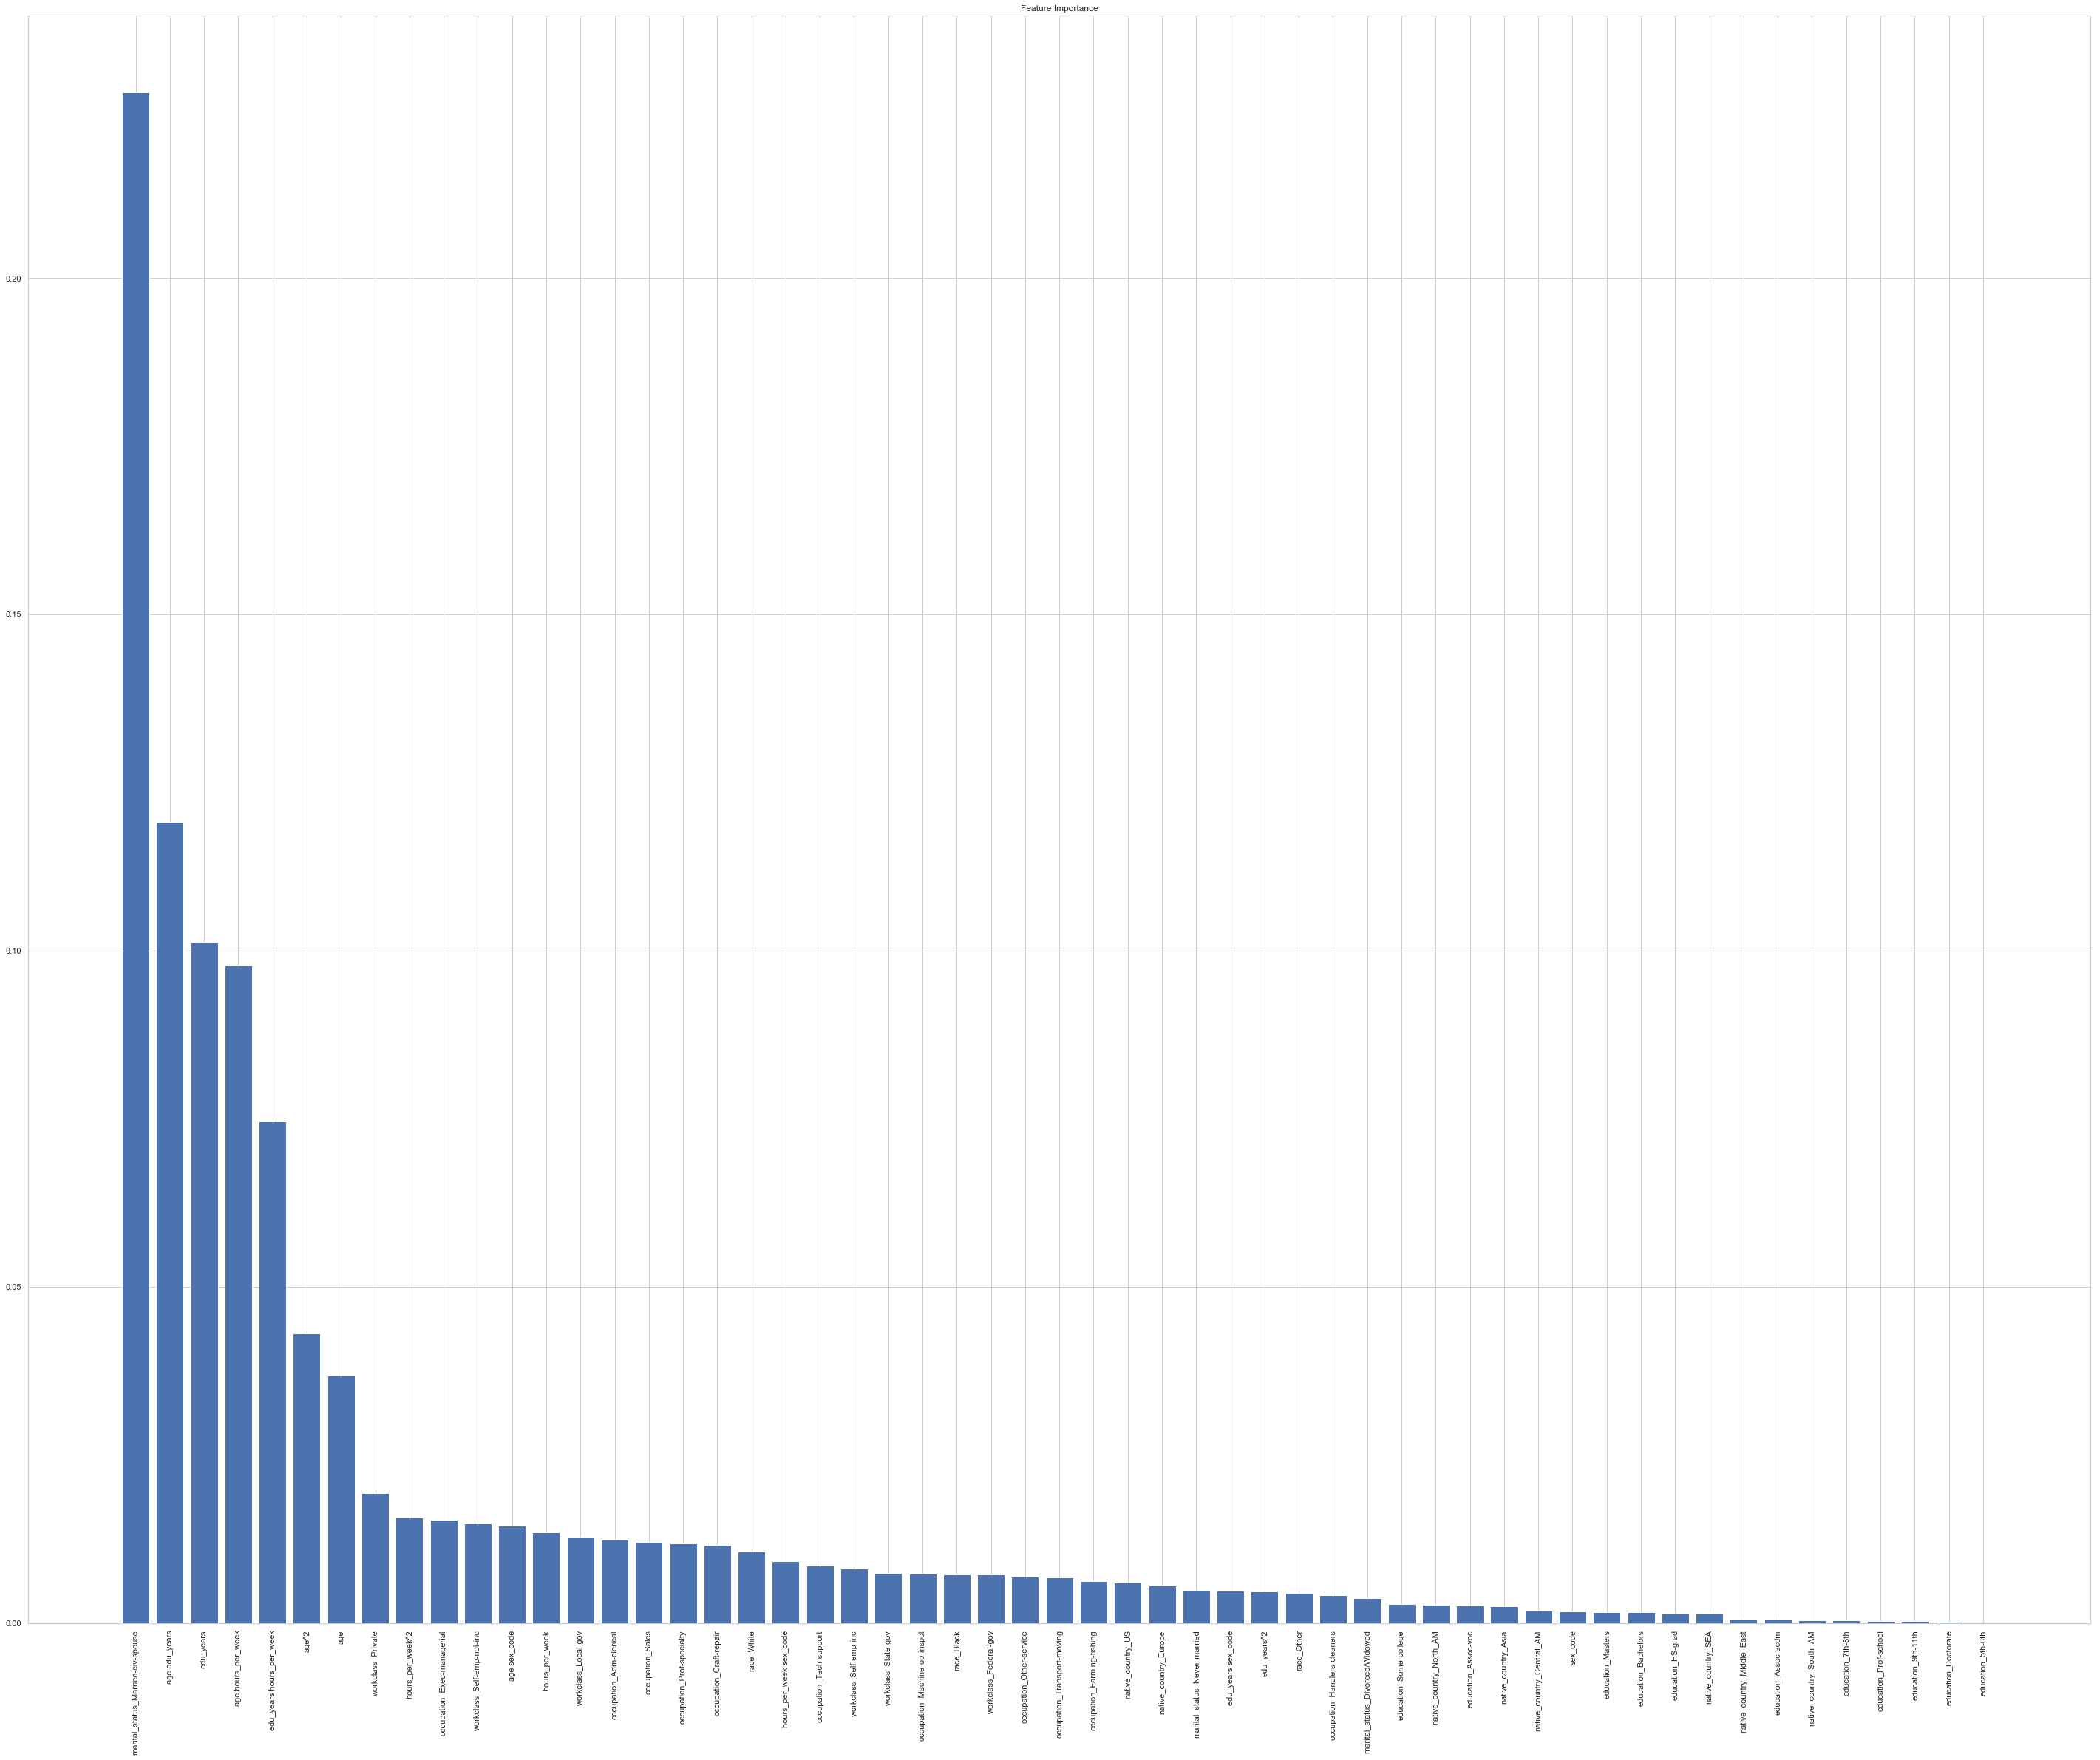

In [60]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [feature_cols[i] for i in indices]

# Create plot
plt.figure()
plt.figure(figsize=(50,40))
# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(df_data.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(df_data.shape[1]), names, rotation=90)

# Show plot
plt.show()

## Creating finalised dataset 

In [65]:
data_final = df_with_dummies_poly[['age', 'edu_years', 'hours_per_week', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'marital_status_Married-civ-spouse',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Sales', 'occupation_Tech-support', 'race_Black',
       'race_White', 'native_country_Europe', 'native_country_US', 'age^2',
       'age edu_years', 'age hours_per_week', 'age sex_code',
       'edu_years hours_per_week', 'edu_years sex_code', 'hours_per_week^2',
       'hours_per_week sex_code','income_code']]

In [66]:
data_final.shape

(29310, 30)

In [67]:
data_final.head()

,age,edu_years,hours_per_week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,marital_status_Married-civ-spouse,occupation_Adm-clerical,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,race_Black,race_White,native_country_Europe,native_country_US,age^2,age edu_years,age hours_per_week,age sex_code,edu_years hours_per_week,edu_years sex_code,hours_per_week^2,hours_per_week sex_code,income_code
0,39,13,40,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1521.0,507.0,1560.0,0.0,520.0,0.0,1600.0,0.0,0
1,50,13,13,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,2500.0,650.0,650.0,0.0,169.0,0.0,169.0,0.0,0
2,38,9,40,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1444.0,342.0,1520.0,0.0,360.0,0.0,1600.0,0.0,0
3,53,7,40,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,2809.0,371.0,2120.0,0.0,280.0,0.0,1600.0,0.0,0
4,28,13,40,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,784.0,364.0,1120.0,28.0,520.0,13.0,1600.0,40.0,0


In [68]:
data_final.to_csv('data_ready.csv')